In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet

In [3]:
# Load data
df = pd.read_excel("Downloads/Retail sales Data/Final data_1.xlsx", sheet_name="Retail Trade")

# Convert year and month to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

In [5]:
# Get unique categories and provinces
categories = sorted(df['Category'].unique())
provinces = sorted(df['Province'].unique())

In [7]:
def display_forecast():
    # Show available options
    print("\nAvailable Categories:")
    for i, cat in enumerate(categories, 1):
        print(f"{i}. {cat}")
    
    print("\nAvailable Provinces:")
    for i, prov in enumerate(provinces, 1):
        print(f"{i}. {prov}")
    
    # Get user input
    while True:
        try:
            cat_choice = int(input("\nEnter category number: ")) - 1
            prov_choice = int(input("Enter province number: ")) - 1
            category = categories[cat_choice]
            province = provinces[prov_choice]
            break
        except (ValueError, IndexError):
            print("Invalid input. Please enter numbers from the lists above.")
    
    # Generate and show plot
    create_forecast_plot(category, province)

In [9]:
def create_forecast_plot(category, province):
    plt.close('all')
    
    # Filter data
    subset = df[(df['Category'] == category) & (df['Province'] == province)]
    if len(subset) < 2:
        print(f" Not enough data to forecast {category} in {province}")
        return
    
    # Prepare Prophet data
    prophet_df = subset[['Date', 'Value', 'Max_Temperature']].rename(columns={'Date': 'ds', 'Value': 'y'})
    
    try:
        model = Prophet(seasonality_mode='multiplicative')
        model.add_regressor('Max_Temperature')
        model.fit(prophet_df)
        
        future = model.make_future_dataframe(periods=12, freq='ME')
        future['Max_Temperature'] = prophet_df['Max_Temperature'].mean()
        forecast = model.predict(future)
        
        # Plotting
        forecast['ds'] = pd.to_datetime(forecast['ds'])
        cutoff_date = pd.to_datetime('2025-04-01')
        actual_data = forecast[forecast['ds'] <= cutoff_date]
        predicted_data = forecast[forecast['ds'] > cutoff_date]
        
        plt.figure(figsize=(16, 8), dpi=100)
        
        # Plot actual (using real historical values)
        plt.plot(subset['Date'], subset['Value'], 
        color='#2E86AB', linewidth=3, label='Actual Sales History', 
        marker='o', markersize=8, markerfacecolor='white', markeredgewidth=2)

        # Plot predicted
        plt.plot(predicted_data['ds'], predicted_data['yhat'], 
                color='#A23B72', linewidth=3, label='Forecasted Sales', 
                linestyle='--', marker='s', markersize=6, markerfacecolor='white', markeredgewidth=2)
        
        # Confidence interval
        plt.fill_between(predicted_data['ds'], 
                        predicted_data['yhat_lower'], 
                        predicted_data['yhat_upper'], 
                        color='#A23B72', alpha=0.15, label='95% Confidence Interval')
        
        # Titles & Labels
        plt.title(f'{province} {category} Sales: Historical Trends & 1-Year Forecast\n', fontsize=20, fontweight='bold')
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Sales (CAD)', fontsize=14)
        
        # Grid & legend
        plt.grid(True, alpha=0.2)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=12, ncol=3)
        
        # Separator line
        plt.axvline(x=cutoff_date, color='#666666', linestyle=':', linewidth=2, alpha=0.7)
        
        # Format dates
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f" Failed to create forecast: {str(e)}")

Retail Sales Forecast Viewer

Available Categories:
1. Clothing and clothing accessories
2. Food and Beverage Retailers
3. Grocery and Convenience retailers
4. Retail Trade
5. Shoe Retailers

Available Provinces:
1. Alberta
2. British Columbia
3. Manitoba
4. New Brunswick
5. Newfoundland and Labrador
6. Northwest Territories
7. Nova Scotia
8. Nunavut
9. Ontario
10. Prince Edward Island
11. Quebec
12. Saskatchewan
13. Yukon



Enter category number:  1
Enter province number:  10


22:37:44 - cmdstanpy - INFO - Chain [1] start processing
22:37:45 - cmdstanpy - INFO - Chain [1] done processing


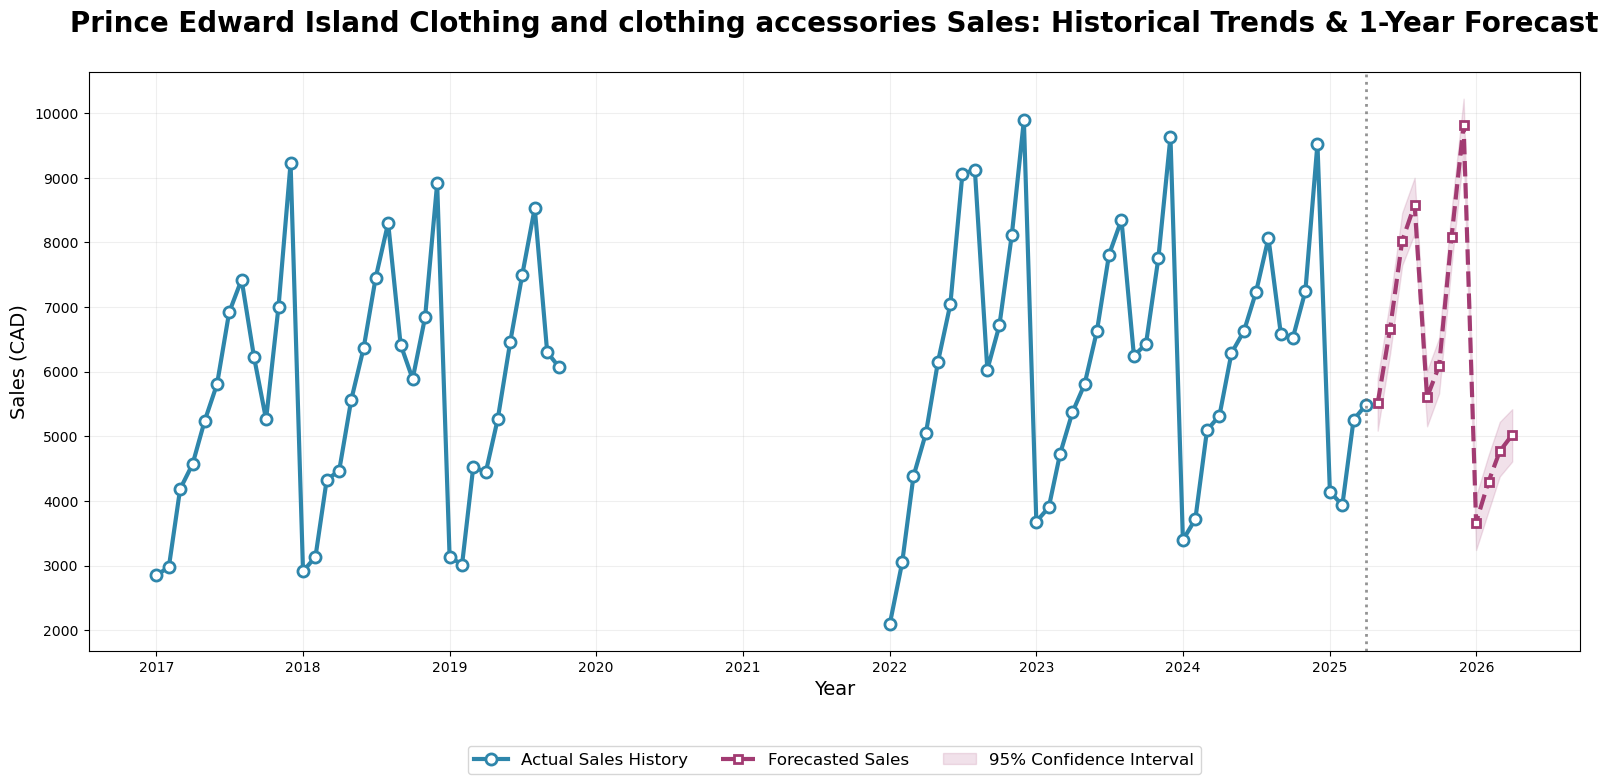

In [ ]:
# Start the interactive session
print("Retail Sales Forecast Viewer")
while True:
    display_forecast()
    if input("\nView another forecast? (y/n): ").lower() != 'y':
        break